In [1]:
import numpy as np  
import pandas as pd   
import matplotlib.pyplot as plt  
from matplotlib.dates import DateFormatter

In [2]:
year = '2020'

spy_file = 'SPY_'+year+'+.csv' #Contains data from 12/30/2019 - 3/04/2021
vix_file = '^VIX_'+year+'.csv' #Contains data from 1/2/2020 - 12/31/2020

spy_data = pd.read_csv(spy_file, index_col = 'Date')
spy_data.drop(['High','Open','Close','Low','Volume'],axis=1, inplace=True)

vix_data = pd.read_csv(vix_file, index_col = 'Date')
vix_data.drop(['Adj Close','High','Low','Close','Volume'],axis=1, inplace=True)

data = pd.merge(spy_data,vix_data,left_index=True,right_index=True,how='left')
data.rename(columns = {"Adj Close": "SPY"}, inplace=True)
data.rename(columns = {"Open": "VIX"}, inplace=True)
data = data.reset_index(level=['Date']);
data.Date = pd.to_datetime(data.Date, format='%Y-%m-%d')

data.head()

,Date,SPY,VIX
0,2019-12-30,315.193817,NaN
1,2019-12-31,315.959503,NaN
2,2020-01-02,318.914307,13.46
3,2020-01-03,316.499451,15.01
4,2020-01-06,317.706909,15.45


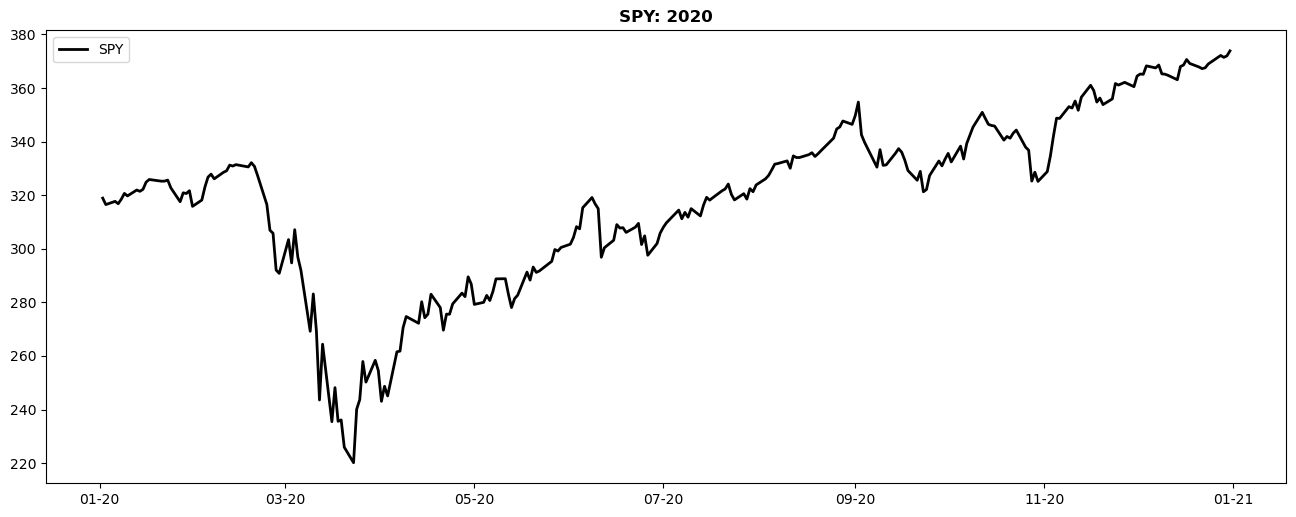

In [3]:
fig = plt.figure(figsize=(16,6),dpi=100) 
ax1 = fig.add_subplot(1,1,1)

x = data[data['Date'].dt.year == 2020].Date
y1 = data[data['Date'].dt.year == 2020].SPY
y2 = data[data['Date'].dt.year == 2020].VIX

date_form = DateFormatter("%m-%y")
ax1.xaxis.set_major_formatter(date_form)
ax1.plot(x, y1,color='k', linewidth=2, linestyle='-', label='SPY')
ax1.legend(loc='upper left', frameon=True) 
plt.title('SPY: 2020',fontweight='bold');


In [13]:
# calculate daily logarithmic return
data['SPY Returns'] = np.log(data.SPY.pct_change()+1.)
      
# calculate daily standard deviation of returns
daily_std = np.std(data['SPY Returns'])
  
# annualized daily standard deviation
std = daily_std * len(x) ** 0.5

In [14]:
data.head()

,Date,SPY,VIX,SPY Returns,Realized SPY Vol
0,2019-12-30,315.193817,NaN,NaN,11.09
1,2019-12-31,315.959503,NaN,0.002426,11.11
2,2020-01-02,318.914307,13.46,0.009308,12.74
3,2020-01-03,316.499451,15.01,-0.007601,12.74
4,2020-01-06,317.706909,15.45,0.003808,14.08


In [15]:
realized_vol = []
for index, row in data.iterrows():
    temp = data['SPY Returns'][(data.Date <= (data.Date[index] + pd.Timedelta(days=30)))&
                               (data.Date>data.Date[index])]
    realized_vol.append(round((np.std(temp)* len(x) ** 0.5)*100,2))

data['Realized SPY Vol'] = realized_vol

In [16]:
data.head()

,Date,SPY,VIX,SPY Returns,Realized SPY Vol
0,2019-12-30,315.193817,NaN,NaN,10.24
1,2019-12-31,315.959503,NaN,0.002426,10.26
2,2020-01-02,318.914307,13.46,0.009308,11.75
3,2020-01-03,316.499451,15.01,-0.007601,11.76
4,2020-01-06,317.706909,15.45,0.003808,13.00


In [17]:
data_2020 = data[data['Date'].dt.year == 2020]

data_2020 = data_2020.reset_index(drop='true')
data_2020.head()

,Date,SPY,VIX,SPY Returns,Realized SPY Vol
0,2020-01-02,318.914307,13.46,0.009308,11.75
1,2020-01-03,316.499451,15.01,-0.007601,11.76
2,2020-01-06,317.706909,15.45,0.003808,13.00
3,2020-01-07,316.813568,13.84,-0.002816,12.93
4,2020-01-08,318.502075,15.16,0.005316,13.07


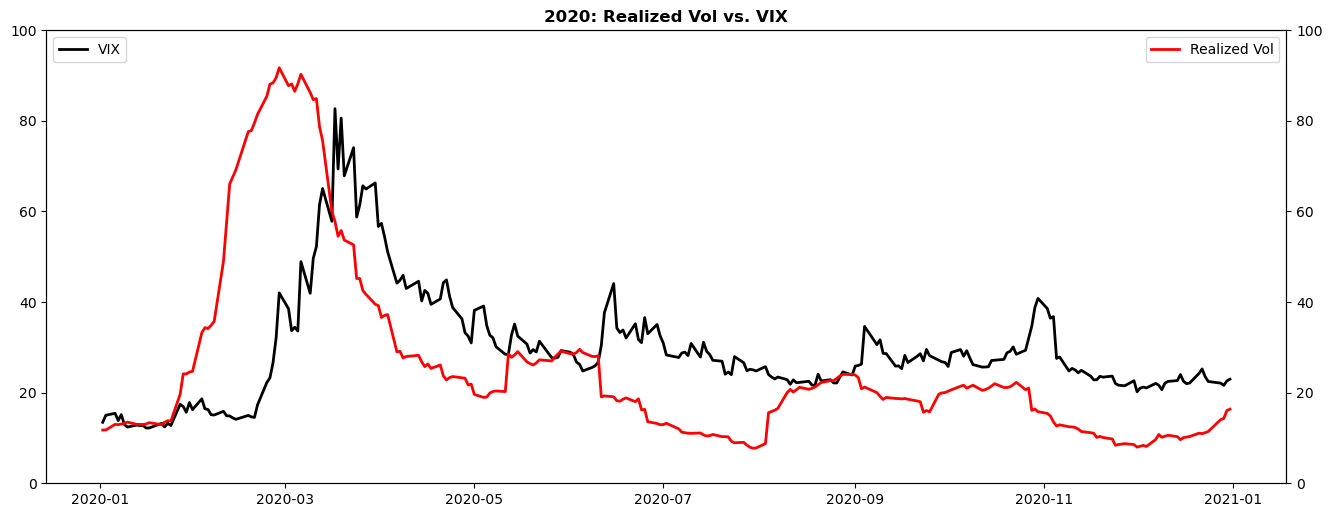

In [18]:
fig = plt.figure(figsize=(16,6),dpi=100) 
ax1 = fig.add_subplot(1,1,1)

plt.title('2020: Realized Vol vs. VIX',fontweight='bold');

x = data_2020.Date
y1 = data_2020.VIX
y2 = data_2020['Realized SPY Vol']

date_form = DateFormatter("%m-%y")
ax1.xaxis.set_major_formatter(date_form)
ax1.set_ylim(0,100)

ax1.plot(x, y1,color='k', linewidth=2, linestyle='-', label='VIX')
ax1.legend(loc='upper left', frameon=True) 

ax2 = ax1.twinx()
ax2.set_ylim(0,100)

ax2.plot(x,y2,color='r',linewidth=2, linestyle='-', label='Realized Vol')
ax2.legend(loc='upper right', frameon=True);

plt.savefig('2020_vix.png',bbox_inches = 'tight',pad_inches=0.5,facecolor='w')

In [19]:
RV_mean = data_2020['Realized SPY Vol'].mean()
VOL_mean = data_2020.VIX.mean()

In [20]:
print('In 2020, the average implied volatility was: '+str(round(VOL_mean,2))+'%.')
print('In 2020, the average realized volatility was: '+str(round(RV_mean,2))+'%.')

In 2020, the average implied volatility was: 29.51%.
In 2020, the average realized volatility was: 25.73%.


In [21]:
percent_overstatement = round(100.*(len(np.where(data_2020.VIX > data_2020['Realized SPY Vol'])[0])/len(data_2020)),2)
print("In 2020, the VIX overstated the 30-day realized volatility {}% of the time.".format(percent_overstatement))

In 2020, the VIX overstated the 30-day realized volatility 76.68% of the time.
